In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import matplotlib.pyplot as plt

# set a device 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
# let's make data 
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.05, random_state=42)

In [3]:
# print first 5 values 
X[:5],y[:5]

(array([[ 0.74220688,  0.24668576],
        [-0.7340323 ,  0.16869164],
        [-0.82985872,  0.22195899],
        [-0.42913559,  0.67223019],
        [ 0.44560223, -0.89493556]]),
 array([1, 1, 1, 1, 0]))

In [4]:
# print X and y shapes 
X.shape,y.shape

((1000, 2), (1000,))

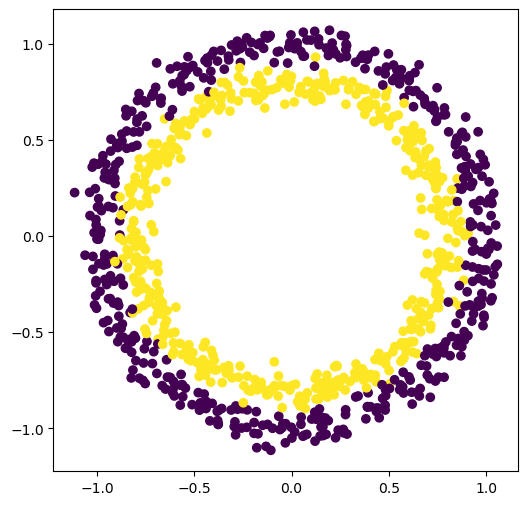

In [5]:
# visualize the data 
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
# create train and test data sets 
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# create model with 2 linear layers 
class CircleClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=2,out_features=5)
        self.linear_2 = nn.Linear(in_features=5,out_features=1)
    
    def forward(self,x):
        return self.linear_2(self.linear_1(x))
    
model_0 = CircleClassification().to(device)
model_0

CircleClassification(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
)

In [8]:
# test model with data, this is just to test whether we built the model correcly or not
y_logits = model_0(X_train[:5].to(device))
y_logits

tensor([[ 0.0711],
        [ 0.1042],
        [-0.3523],
        [-0.3187],
        [-0.3249]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [9]:
# calculate accuracy 
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc
    

In [10]:
torch.manual_seed(42)

# create loss function and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model_0.parameters(),lr=0.1)

# set number of epochs 
epochs = 1000

# put data into target device 
X_train,y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)

# training and testing loops 

for epoch in range(epochs):
    ### training 
    model_0.train()
    
    # forward pass 
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # get the loss and accuracy 
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_train,y_pred)
    
    # optimizer zero grad 
    optimizer.zero_grad()
    
    # loss backward 
    loss.backward()
    
    # optiizer step 
    optimizer.step()
    
    ### testing 
    model_0.eval()
    with torch.inference_mode():
        # forward pass 
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # get the loss and accuracy 
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(test_pred,y_test)
        
    # print loss/accuracy
    if epoch % 100 == 0: 
        print(f'Epoch:{epoch} | Loss:{loss:.5f} | Accuracy:{acc:.5f} | Test Loss:{test_loss:.5f} | Test Acc:{test_acc:.5f}')
    


Epoch:0 | Loss:0.70032 | Accuracy:47.75000 | Test Loss:0.69807 | Test Acc:46.00000
Epoch:100 | Loss:0.69368 | Accuracy:50.37500 | Test Loss:0.69314 | Test Acc:45.50000
Epoch:200 | Loss:0.69311 | Accuracy:49.62500 | Test Loss:0.69357 | Test Acc:49.00000
Epoch:300 | Loss:0.69301 | Accuracy:50.87500 | Test Loss:0.69405 | Test Acc:46.50000
Epoch:400 | Loss:0.69299 | Accuracy:50.87500 | Test Loss:0.69434 | Test Acc:45.50000
Epoch:500 | Loss:0.69298 | Accuracy:51.25000 | Test Loss:0.69450 | Test Acc:46.00000
Epoch:600 | Loss:0.69298 | Accuracy:51.25000 | Test Loss:0.69458 | Test Acc:45.50000
Epoch:700 | Loss:0.69298 | Accuracy:51.37500 | Test Loss:0.69462 | Test Acc:46.00000
Epoch:800 | Loss:0.69298 | Accuracy:51.50000 | Test Loss:0.69464 | Test Acc:45.50000
Epoch:900 | Loss:0.69298 | Accuracy:51.50000 | Test Loss:0.69465 | Test Acc:45.50000


In [11]:
# make a new model by adding non linearity (activation function)

class CircleClassificationV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=2,out_features=10)
        self.linear_2 = nn.Linear(in_features=10,out_features=10)
        self.linear_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        return self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x)))))
    
model_1 = CircleClassificationV2().to(device)
model_1

CircleClassificationV2(
  (linear_1): Linear(in_features=2, out_features=10, bias=True)
  (linear_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [12]:
torch.manual_seed(42)

# create loss function and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model_1.parameters(),lr=0.1)

# set number of epochs 
epochs = 2000

# put data into target device 
X_train,y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)

# training and testing loops 

for epoch in range(epochs):
    ### training 
    model_1.train()
    
    # forward pass 
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # get the loss and accuracy 
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_train,y_pred)
    
    # optimizer zero grad 
    optimizer.zero_grad()
    
    # loss backward 
    loss.backward()
    
    # optiizer step 
    optimizer.step()
    
    ### testing 
    model_1.eval()
    with torch.inference_mode():
        # forward pass 
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # get the loss and accuracy 
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(test_pred,y_test)
        
    # print loss/accuracy
    if epoch % 200 == 0: 
        print(f'Epoch:{epoch} | Loss:{loss:.5f} | Accuracy:{acc:.5f} | Test Loss:{test_loss:.5f} | Test Acc:{test_acc:.5f}')
    


Epoch:0 | Loss:0.69295 | Accuracy:50.00000 | Test Loss:0.69329 | Test Acc:50.00000
Epoch:200 | Loss:0.68978 | Accuracy:54.25000 | Test Loss:0.68976 | Test Acc:54.50000
Epoch:400 | Loss:0.68530 | Accuracy:52.87500 | Test Loss:0.68492 | Test Acc:55.00000
Epoch:600 | Loss:0.67545 | Accuracy:54.50000 | Test Loss:0.67503 | Test Acc:56.00000
Epoch:800 | Loss:0.65355 | Accuracy:63.50000 | Test Loss:0.65369 | Test Acc:68.00000
Epoch:1000 | Loss:0.57644 | Accuracy:84.62500 | Test Loss:0.58984 | Test Acc:84.00000
Epoch:1200 | Loss:0.40085 | Accuracy:93.87500 | Test Loss:0.45558 | Test Acc:85.50000
Epoch:1400 | Loss:0.22498 | Accuracy:97.37500 | Test Loss:0.31198 | Test Acc:91.00000
Epoch:1600 | Loss:0.14305 | Accuracy:97.50000 | Test Loss:0.23322 | Test Acc:92.00000
Epoch:1800 | Loss:0.10597 | Accuracy:98.12500 | Test Loss:0.19195 | Test Acc:93.00000
